<a href="https://colab.research.google.com/github/bintangnabiil/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/main/Rangkuman_Chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 5: Support Vector Machines
Support Vector Machines (SVM) adalah salah satu algoritma machine learning yang paling powerful dan versatile, cocok untuk klasifikasi, regresi, dan deteksi outlier. SVM sangat efektif untuk dataset dengan dimensi tinggi dan sangat efisien dalam penggunaan memori.

##1. Linear SVM Classification
###Konsep Dasar
SVM bekerja dengan cara mencari hyperplane optimal yang memisahkan kelas-kelas data dengan margin maksimal. Margin adalah jarak antara hyperplane dan data point terdekat dari masing-masing kelas (support vectors).

Karakteristik Utama:

- Support Vectors: Data point yang berada tepat di batas margin
- Hard Margin: Tidak mentolerir kesalahan klasifikasi
- Soft Margin: Mentolerir beberapa kesalahan untuk fleksibilitas yang lebih baik
- C Parameter: Mengontrol trade-off antara margin lebar vs kesalahan klasifikasi

###Matematika di Balik SVM
Tujuan SVM adalah memaksimalkan margin, yang secara matematis dapat diformulasikan sebagai masalah optimisasi:

- Minimize: ½||w||² + C∑ξᵢ
- Subject to: yᵢ(wᵀxᵢ + b) ≥ 1 - ξᵢ dan ξᵢ ≥ 0

Di mana:

- w: weight vector
- b: bias term
- C: regularization parameter
- ξᵢ: slack variables

##2. Nonlinear SVM Classification
###olynomial Features
Untuk data yang tidak dapat dipisahkan secara linear, SVM dapat menggunakan polynomial features untuk mentransformasi data ke dimensi yang lebih tinggi.

###Kernel Trick
Kernel trick memungkinkan SVM untuk bekerja dalam ruang dimensi tinggi tanpa benar-benar menghitung koordinat data dalam ruang tersebut.

###Jenis-jenis Kernel:

- Linear Kernel: K(a,b) = aᵀb
- Polynomial Kernel: K(a,b) = (γaᵀb + r)ᵈ
- Gaussian RBF Kernel: K(a,b) = exp(-γ||a-b||²)
- Sigmoid Kernel: K(a,b) = tanh(γaᵀb + r)

###Parameter Tuning

- γ (gamma): Mengontrol seberapa jauh influence setiap training example. Nilai tinggi = overfitting, nilai rendah = underfitting
- C: Regularization parameter. Nilai tinggi = hard margin, nilai rendah = soft margin
- degree: Untuk polynomial kernel, menentukan derajat polynomial

##3. SVM Regression
SVM juga dapat digunakan untuk regresi (SVR - Support Vector Regression). Tujuannya adalah menemukan hyperplane yang sebanyak mungkin data point berada dalam margin ε (epsilon).

###Karakteristik SVR:

- ε-insensitive: Tidak ada penalty untuk error yang lebih kecil dari ε
- Support Vectors: Data point yang berada di luar margin ε atau di boundary margin

##4. Computational Complexity
###Time Complexity:

- Training: O(m² × n) hingga O(m³ × n) untuk algoritma SMO
- Prediction: O(s × n) di mana s adalah jumlah support vectors

###Space Complexity:

- O(s × n) untuk menyimpan support vectors

###Scaling:

- SVM tidak scale well untuk dataset sangat besar (>100,000 samples)
- Perlu feature scaling untuk performa optimal

#Implementasi Kode

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

# Set style untuk plotting
plt.style.use('seaborn-v0_8')
np.random.seed(42)

##1. Linear SVM Classification

1. LINEAR SVM CLASSIFICATION


(np.float64(2.9), np.float64(7.0), np.float64(0.8), np.float64(2.7))

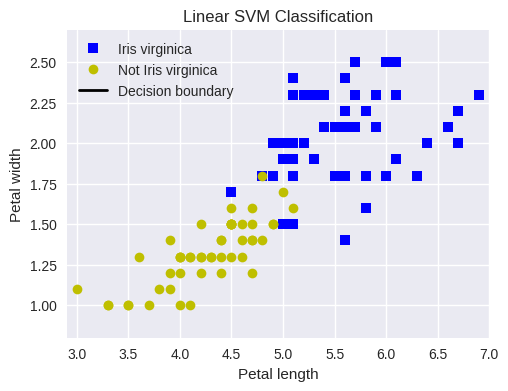

In [2]:
# 1. LINEAR SVM CLASSIFICATION
print("="*50)
print("1. LINEAR SVM CLASSIFICATION")
print("="*50)

# Load iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

# Train linear SVM
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel="linear", C=1))
])

svm_clf.fit(X, y)

# Plotting decision boundary
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf["linear_svc"].coef_[0]
    b = svm_clf["linear_svc"].intercept_[0]

    # Decision boundary: w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    return x0, decision_boundary, gutter_up, gutter_down

plt.figure(figsize=(12, 4))

# Plot 1: Linear SVM
plt.subplot(1, 2, 1)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Not Iris virginica")

x0, decision_boundary, gutter_up, gutter_down = plot_svc_decision_boundary(svm_clf, 2.9, 7)
plt.plot(x0, decision_boundary, "k-", linewidth=2, label="Decision boundary")
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title("Linear SVM Classification")
plt.axis([2.9, 7, 0.8, 2.7])

##2. Polynomial Kernel SVM


2. POLYNOMIAL KERNEL SVM


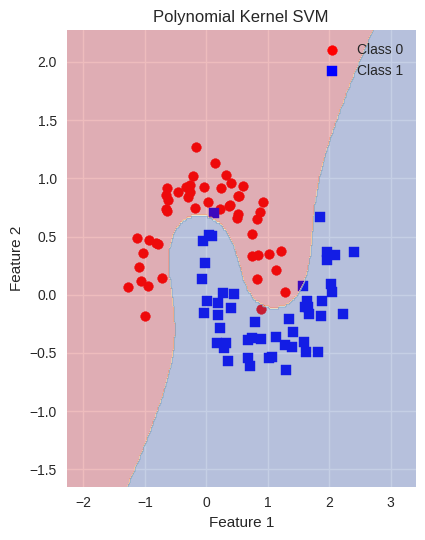

In [3]:
# 2. POLYNOMIAL KERNEL SVM
print("\n2. POLYNOMIAL KERNEL SVM")

# Create more complex dataset
X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)

# Compare different kernels
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

# Plot 2: Polynomial Kernel
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='red', marker='o', label='Class 0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='blue', marker='s', label='Class 1')

# Create decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Polynomial Kernel SVM")

plt.tight_layout()
plt.show()

##3. RBF Kernel Comparison


3. RBF KERNEL COMPARISON


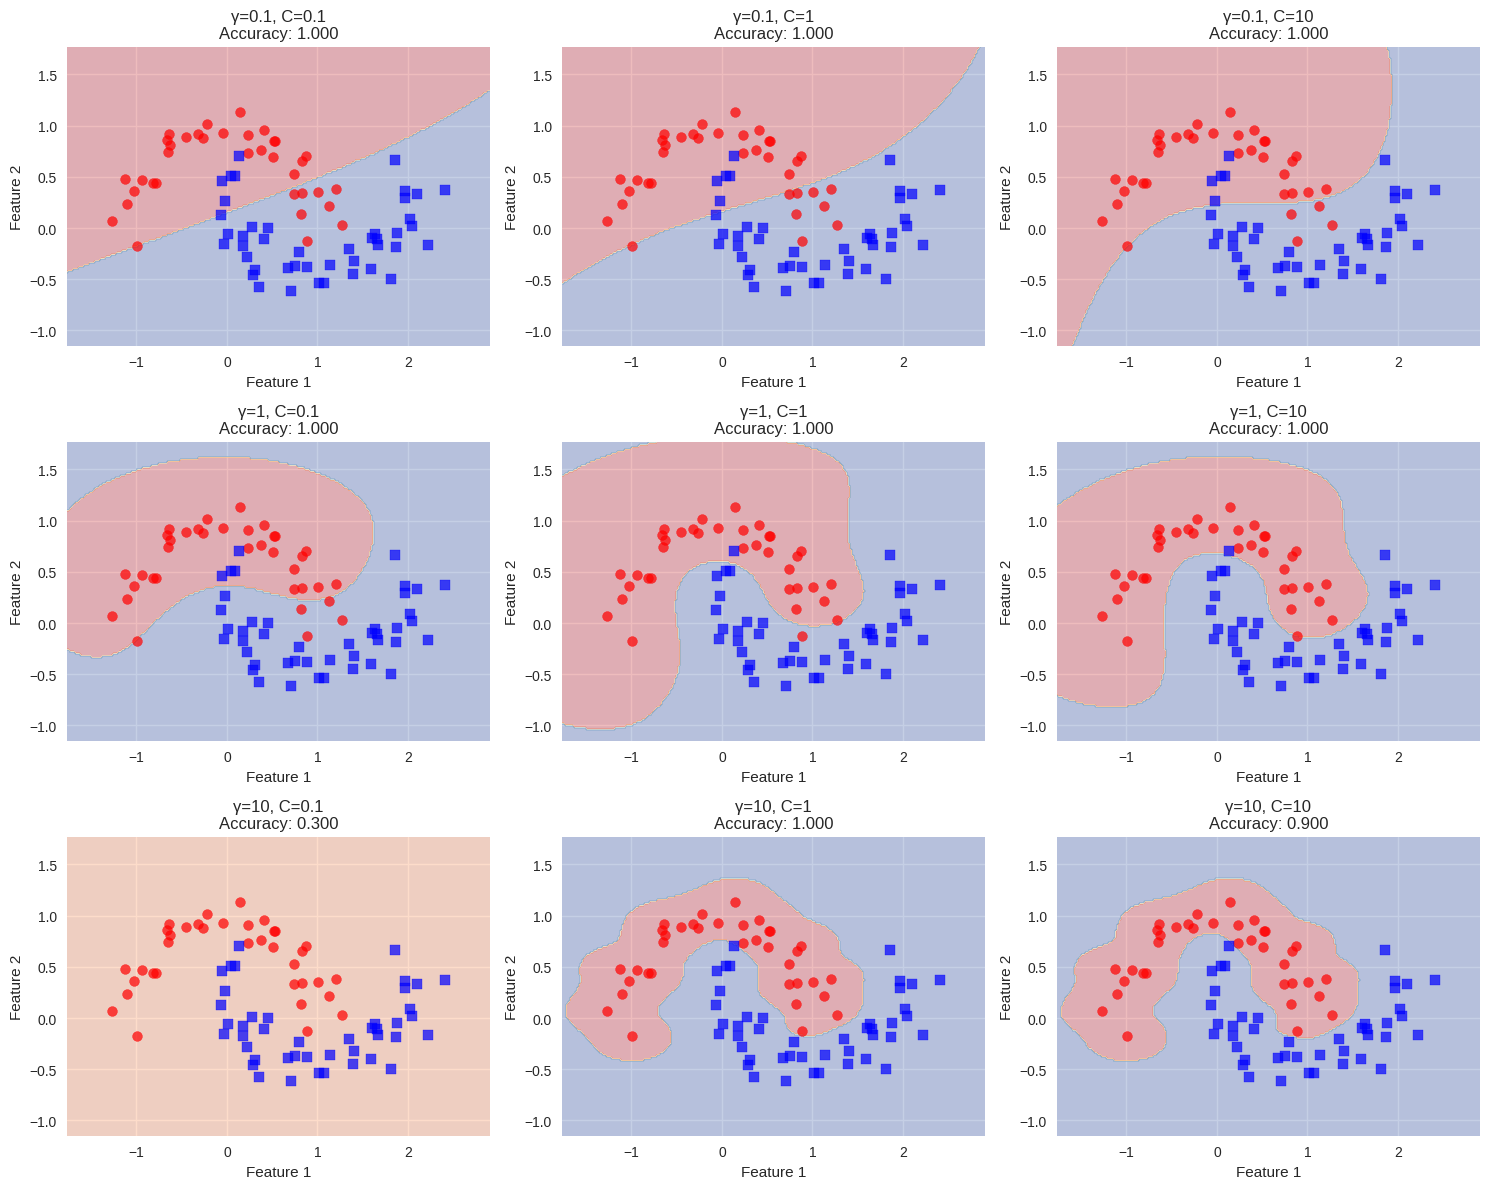

In [4]:
# 3. RBF KERNEL COMPARISON
print("\n3. RBF KERNEL COMPARISON")
print("="*30)

# Compare different gamma values
X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gamma_values = [0.1, 1, 10]
C_values = [0.1, 1, 10]

fig, axes = plt.subplots(len(gamma_values), len(C_values), figsize=(15, 12))

for i, gamma in enumerate(gamma_values):
    for j, C in enumerate(C_values):
        # Train SVM
        svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])

        svm_clf.fit(X_train, y_train)

        # Plot decision boundary
        ax = axes[i, j]

        # Create mesh
        h = 0.02
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
        ax.scatter(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0],
                  c='red', marker='o', s=50, alpha=0.7)
        ax.scatter(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1],
                  c='blue', marker='s', s=50, alpha=0.7)

        # Calculate accuracy
        accuracy = svm_clf.score(X_test, y_test)
        ax.set_title(f'γ={gamma}, C={C}\nAccuracy: {accuracy:.3f}')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

##4. SVM Regression (SVR)


4. SVM REGRESSION


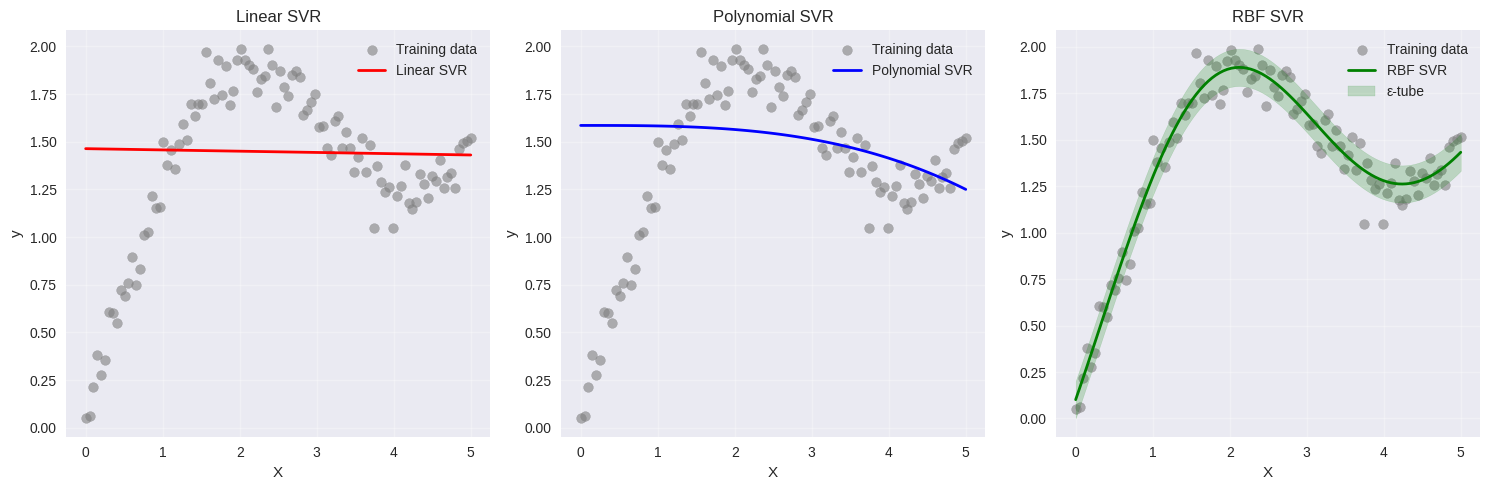

In [5]:
# 4. SVM REGRESSION (SVR)
print("\n4. SVM REGRESSION")
print("="*20)

# Generate regression data
np.random.seed(42)
X = np.linspace(0, 5, 100).reshape(-1, 1)
y = 0.5 * X.ravel() + np.sin(X.ravel()) + 0.1 * np.random.randn(100)

# Train different SVR models
svr_linear = SVR(kernel='linear', C=100, epsilon=0.1)
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1)
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

svrs = [svr_linear, svr_poly, svr_rbf]
kernel_names = ['Linear', 'Polynomial', 'RBF']
colors = ['red', 'blue', 'green']

plt.figure(figsize=(15, 5))

for i, (svr, kernel_name, color) in enumerate(zip(svrs, kernel_names, colors)):
    plt.subplot(1, 3, i+1)

    # Fit the model
    svr.fit(X, y)

    # Predict
    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    y_pred = svr.predict(X_plot)

    # Plot
    plt.scatter(X, y, color='gray', alpha=0.6, label='Training data')
    plt.plot(X_plot, y_pred, color=color, linewidth=2, label=f'{kernel_name} SVR')

    # Plot epsilon tube for RBF (as example)
    if kernel_name == 'RBF':
        plt.fill_between(X_plot.ravel(), y_pred - 0.1, y_pred + 0.1,
                        alpha=0.2, color=color, label='ε-tube')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'{kernel_name} SVR')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##5. Hyperparameter Tuning With Grid Search

In [6]:
# 5. HYPERPARAMETER TUNING WITH GRID SEARCH
print("\n5. HYPERPARAMETER TUNING")
print("="*30)

# Load a larger dataset for meaningful tuning
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = [
    {'svm_clf__C': [0.1, 1, 10, 100], 'svm_clf__kernel': ['linear']},
    {'svm_clf__C': [0.1, 1, 10, 100], 'svm_clf__gamma': [0.001, 0.01, 0.1, 1], 'svm_clf__kernel': ['rbf']},
    {'svm_clf__C': [0.1, 1, 10, 100], 'svm_clf__gamma': [0.001, 0.01, 0.1, 1],
     'svm_clf__degree': [2, 3, 4], 'svm_clf__kernel': ['poly']}
]

# Create pipeline
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC())
])

# Grid search
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5,
                          scoring='accuracy', verbose=1, n_jobs=-1)

print("Performing Grid Search...")
grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Test on test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Detailed classification report
y_pred = best_model.predict(X_test)
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))



5. HYPERPARAMETER TUNING
Performing Grid Search...
Fitting 5 folds for each of 68 candidates, totalling 340 fits

Best parameters: {'svm_clf__C': 0.1, 'svm_clf__kernel': 'linear'}
Best cross-validation score: 0.9736
Test accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



##6. Computational Complexity Analysis


6. COMPUTATIONAL COMPLEXITY ANALYSIS
Size:  100 | Linear: 0.003s | RBF: 0.002s
Size:  500 | Linear: 0.037s | RBF: 0.015s
Size: 1000 | Linear: 0.084s | RBF: 0.053s
Size: 2000 | Linear: 0.231s | RBF: 0.197s


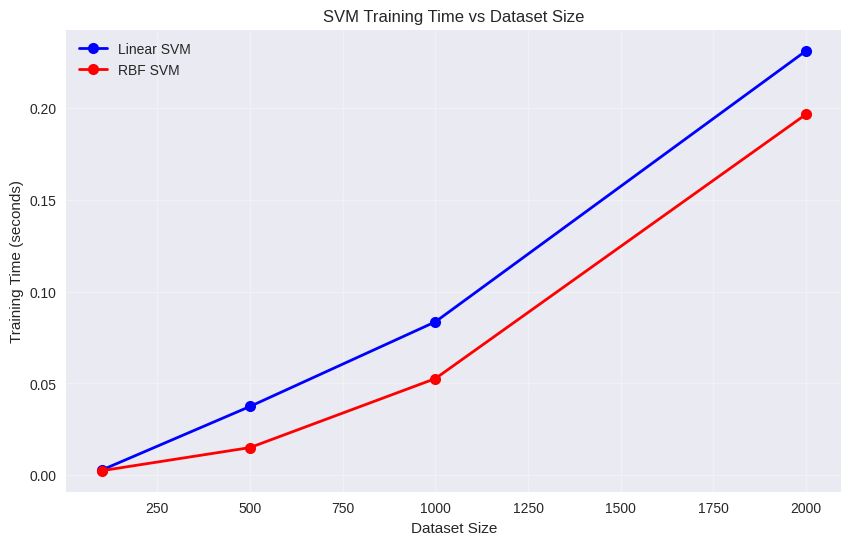


SUMMARY OF KEY POINTS:
1. SVM finds optimal hyperplane with maximum margin
2. Kernel trick enables non-linear classification
3. C parameter controls regularization strength
4. γ parameter controls decision boundary complexity
5. Feature scaling is crucial for SVM performance
6. SVM works well for high-dimensional data
7. Computational complexity can be high for large datasets


In [7]:
# 6. COMPUTATIONAL COMPLEXITY ANALYSIS
print("\n6. COMPUTATIONAL COMPLEXITY ANALYSIS")
print("="*40)

import time

# Test different dataset sizes
sizes = [100, 500, 1000, 2000]
linear_times = []
rbf_times = []

for size in sizes:
    # Generate data
    X, y = datasets.make_classification(n_samples=size, n_features=20,
                                       n_redundant=0, random_state=42)

    # Linear SVM
    start_time = time.time()
    svm_linear = SVC(kernel='linear', C=1)
    svm_linear.fit(X, y)
    linear_time = time.time() - start_time
    linear_times.append(linear_time)

    # RBF SVM
    start_time = time.time()
    svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
    svm_rbf.fit(X, y)
    rbf_time = time.time() - start_time
    rbf_times.append(rbf_time)

    print(f"Size: {size:4d} | Linear: {linear_time:.3f}s | RBF: {rbf_time:.3f}s")

# Plot complexity
plt.figure(figsize=(10, 6))
plt.plot(sizes, linear_times, 'bo-', label='Linear SVM', linewidth=2, markersize=8)
plt.plot(sizes, rbf_times, 'ro-', label='RBF SVM', linewidth=2, markersize=8)
plt.xlabel('Dataset Size')
plt.ylabel('Training Time (seconds)')
plt.title('SVM Training Time vs Dataset Size')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n" + "="*50)
print("SUMMARY OF KEY POINTS:")
print("="*50)
print("1. SVM finds optimal hyperplane with maximum margin")
print("2. Kernel trick enables non-linear classification")
print("3. C parameter controls regularization strength")
print("4. γ parameter controls decision boundary complexity")
print("5. Feature scaling is crucial for SVM performance")
print("6. SVM works well for high-dimensional data")
print("7. Computational complexity can be high for large datasets")